In [4]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as colormap

In [5]:
M = np.random.randint(-1, 2, size=(10, 10))

In [6]:
M

array([[-1, -1,  1,  0, -1,  1,  0,  1,  0,  1],
       [-1,  0,  0,  0,  0, -1,  1,  1,  1,  0],
       [ 0,  1, -1,  0,  0,  0,  0, -1, -1, -1],
       [-1,  0,  1,  0,  1,  1, -1,  0,  0, -1],
       [-1,  1, -1,  0,  0,  1, -1,  0,  0,  1],
       [ 0, -1,  1,  0,  1,  0,  1,  0,  0, -1],
       [-1,  0,  0,  1,  0,  0,  1,  1, -1,  0],
       [ 0,  1, -1, -1, -1, -1,  1, -1, -1,  0],
       [ 0, -1,  0, -1, -1, -1,  1,  0,  0,  0],
       [ 0, -1, -1,  0,  0, -1,  0,  0, -1, -1]])

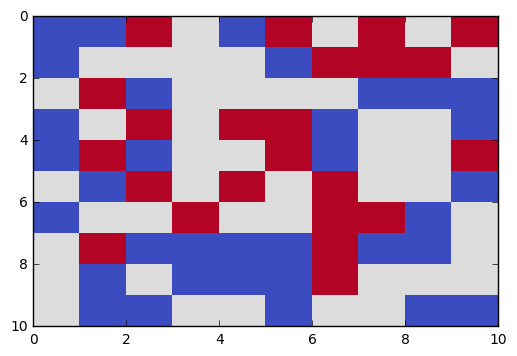

In [7]:
plt.pcolor(M, cmap=colormap.coolwarm)
plt.gca().invert_yaxis()

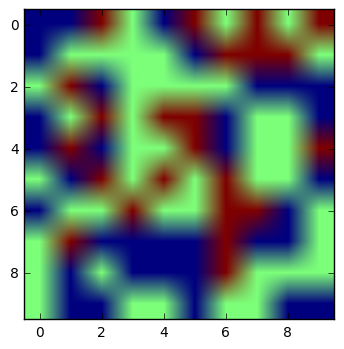

In [8]:
plt.imshow(M)

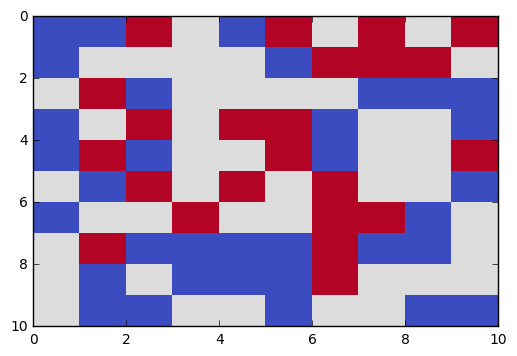

In [9]:
def plot_matrix(M):
    plt.pcolor(M, cmap=colormap.coolwarm)
    plt.gca().invert_yaxis()
    
plot_matrix(M)

In [10]:
M.shape

(10, 10)

In [11]:
np.prod(M.shape)

100

In [12]:
M

array([[-1, -1,  1,  0, -1,  1,  0,  1,  0,  1],
       [-1,  0,  0,  0,  0, -1,  1,  1,  1,  0],
       [ 0,  1, -1,  0,  0,  0,  0, -1, -1, -1],
       [-1,  0,  1,  0,  1,  1, -1,  0,  0, -1],
       [-1,  1, -1,  0,  0,  1, -1,  0,  0,  1],
       [ 0, -1,  1,  0,  1,  0,  1,  0,  0, -1],
       [-1,  0,  0,  1,  0,  0,  1,  1, -1,  0],
       [ 0,  1, -1, -1, -1, -1,  1, -1, -1,  0],
       [ 0, -1,  0, -1, -1, -1,  1,  0,  0,  0],
       [ 0, -1, -1,  0,  0, -1,  0,  0, -1, -1]])

In [13]:
N = np.zeros(M.shape, dtype=int)

In [14]:
N

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
N[0, 0] = 2
N

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
num_rows, num_cols = M.shape
for row in range(num_rows):
    for col in range (num_cols):
        neighbor_rows = range(max(0, row-1), min(num_rows, row+2))
        neighbor_cols = range(max(0, col-1), min(num_cols, col+2))
        neighbor_sum = 0
        for r in neighbor_rows:
            for c in neighbor_cols:
                if (r, c) != (row,col):
                    neighbor_sum += M[r, c]
                    
        N[row, col] = neighbor_sum

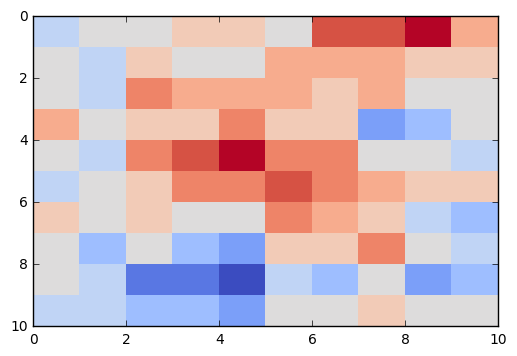

In [17]:
plot_matrix(N)

In [18]:
from scipy import ndimage
kernel = np.array([[1,1,1], [1,0,1], [1,1,1]])
ndimage.convolve(M, kernel, mode='constant', cval=0)

array([[-2, -1, -1,  0,  0, -1,  3,  3,  4,  1],
       [-1, -2,  0, -1, -1,  1,  1,  1,  0,  0],
       [-1, -2,  2,  1,  1,  1,  0,  1, -1, -1],
       [ 1, -1,  0,  0,  2,  0,  0, -4, -3, -1],
       [-1, -2,  2,  3,  4,  2,  2, -1, -1, -2],
       [-2, -1,  0,  2,  2,  3,  2,  1,  0,  0],
       [ 0, -1,  0, -1, -1,  2,  1,  0, -2, -3],
       [-1, -3, -1, -3, -4,  0,  0,  2, -1, -2],
       [-1, -2, -5, -5, -6, -2, -3, -1, -4, -3],
       [-2, -2, -3, -3, -4, -1, -1,  0, -1, -1]])

# Part 2

In [19]:
M

array([[-1, -1,  1,  0, -1,  1,  0,  1,  0,  1],
       [-1,  0,  0,  0,  0, -1,  1,  1,  1,  0],
       [ 0,  1, -1,  0,  0,  0,  0, -1, -1, -1],
       [-1,  0,  1,  0,  1,  1, -1,  0,  0, -1],
       [-1,  1, -1,  0,  0,  1, -1,  0,  0,  1],
       [ 0, -1,  1,  0,  1,  0,  1,  0,  0, -1],
       [-1,  0,  0,  1,  0,  0,  1,  1, -1,  0],
       [ 0,  1, -1, -1, -1, -1,  1, -1, -1,  0],
       [ 0, -1,  0, -1, -1, -1,  1,  0,  0,  0],
       [ 0, -1, -1,  0,  0, -1,  0,  0, -1, -1]])

In [20]:
np.where(M == 0)

(array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
        5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9], dtype=int64),
 array([3, 6, 8, 1, 2, 3, 4, 9, 0, 3, 4, 5, 6, 1, 3, 7, 8, 3, 4, 7, 8, 0, 3,
        5, 7, 8, 1, 2, 4, 5, 9, 0, 9, 0, 2, 7, 8, 9, 0, 3, 4, 6, 7], dtype=int64))

In [21]:
zero_rows, zero_cols = np.where(M == 0)
list(zip(zero_rows, zero_cols))

[(0, 3),
 (0, 6),
 (0, 8),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 9),
 (2, 0),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 3),
 (3, 7),
 (3, 8),
 (4, 3),
 (4, 4),
 (4, 7),
 (4, 8),
 (5, 0),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 8),
 (6, 1),
 (6, 2),
 (6, 4),
 (6, 5),
 (6, 9),
 (7, 0),
 (7, 9),
 (8, 0),
 (8, 2),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 3),
 (9, 4),
 (9, 6),
 (9, 7)]

In [22]:
list(zip(*np.where(M == 0)))

[(0, 3),
 (0, 6),
 (0, 8),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 9),
 (2, 0),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 3),
 (3, 7),
 (3, 8),
 (4, 3),
 (4, 4),
 (4, 7),
 (4, 8),
 (5, 0),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 8),
 (6, 1),
 (6, 2),
 (6, 4),
 (6, 5),
 (6, 9),
 (7, 0),
 (7, 9),
 (8, 0),
 (8, 2),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 3),
 (9, 4),
 (9, 6),
 (9, 7)]

In [23]:
random_zero = random.choice(list(zip(zero_rows, zero_cols)))
random_zero

(9, 6)

In [24]:
def schelling_move(M, row, col):
    '''
    Take the element at M(row, col) and move it to a random empty space.
    '''
    
    #Choose a destination
    zero_rows, zero_cols = np.where(M == 0)
    new_row, new_col = random.choice(list(zip(zero_rows, zero_cols)))
    
    #Move the value
    M[new_row, new_col] = M[row, col]
    M[row, col] = 0

In [25]:
schelling_move?

In [26]:
M

array([[-1, -1,  1,  0, -1,  1,  0,  1,  0,  1],
       [-1,  0,  0,  0,  0, -1,  1,  1,  1,  0],
       [ 0,  1, -1,  0,  0,  0,  0, -1, -1, -1],
       [-1,  0,  1,  0,  1,  1, -1,  0,  0, -1],
       [-1,  1, -1,  0,  0,  1, -1,  0,  0,  1],
       [ 0, -1,  1,  0,  1,  0,  1,  0,  0, -1],
       [-1,  0,  0,  1,  0,  0,  1,  1, -1,  0],
       [ 0,  1, -1, -1, -1, -1,  1, -1, -1,  0],
       [ 0, -1,  0, -1, -1, -1,  1,  0,  0,  0],
       [ 0, -1, -1,  0,  0, -1,  0,  0, -1, -1]])

In [27]:
schelling_move(M, 9, 9)
M

array([[-1, -1,  1,  0, -1,  1,  0,  1,  0,  1],
       [-1, -1,  0,  0,  0, -1,  1,  1,  1,  0],
       [ 0,  1, -1,  0,  0,  0,  0, -1, -1, -1],
       [-1,  0,  1,  0,  1,  1, -1,  0,  0, -1],
       [-1,  1, -1,  0,  0,  1, -1,  0,  0,  1],
       [ 0, -1,  1,  0,  1,  0,  1,  0,  0, -1],
       [-1,  0,  0,  1,  0,  0,  1,  1, -1,  0],
       [ 0,  1, -1, -1, -1, -1,  1, -1, -1,  0],
       [ 0, -1,  0, -1, -1, -1,  1,  0,  0,  0],
       [ 0, -1, -1,  0,  0, -1,  0,  0, -1,  0]])

In [30]:
def schelling_tick(M, threshold=0.5):
    num_rows, num_cols = M.shape
    moved_cells = []
    for row in range(num_rows):
        for col in range (num_cols):
            if M[row, col] == 0:
                continue
            neighbor_rows = range(max(0, row-1), min(num_rows, row+2))
            neighbor_cols = range(max(0, col-1), min(num_cols, col+2))
            total_neighbors = len(neighbor_rows) * len(neighbor_cols) -1
            unlike_neighbors = 0
            for r in neighbor_rows:
                for c in neighbor_cols:
                    if (r, c) != (row,col):
                        my_value = M[row,col]
                        neighbor_value = M[r,c]
                        if my_value != neighbor_value and neighbor_value != 0:
                            unlike_neighbors += 1
                            
            if unlike_neighbors / total_neighbors > threshold:
                schelling_move(M, row, col)
                moved_cells.append((row,col))
    return moved_cells

In [31]:
schelling_tick(M)

[]

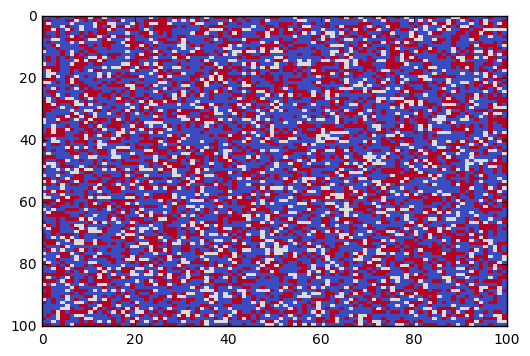

In [32]:
M = np.random.choice([-1, -1, -1, 0, 1, 1], size=(100, 100))
plot_matrix(M)
num_unhappy = []

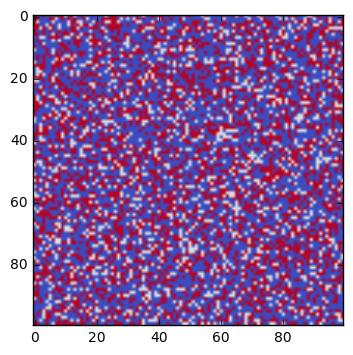

In [33]:
plt.imshow(M, cmap=colormap.coolwarm)

647


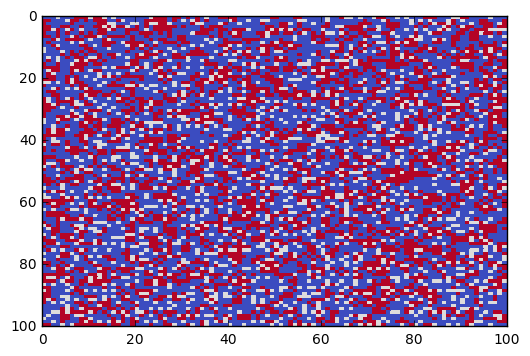

In [34]:
moved = schelling_tick(M, 0.7)
plot_matrix(M)
print(len(moved))
num_unhappy.append((len(moved)/ np.prod(M.shape)))

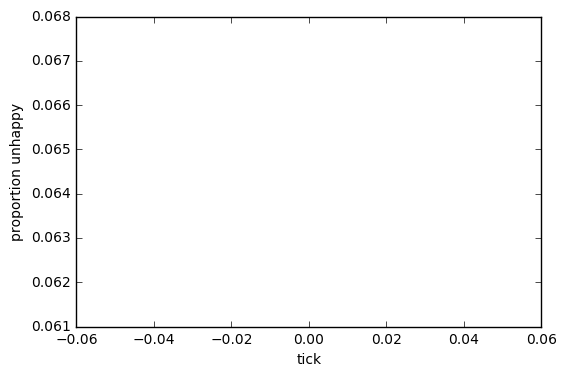

In [35]:
plt.plot(num_unhappy)
plt.xlabel('tick')
plt.ylabel('proportion unhappy')

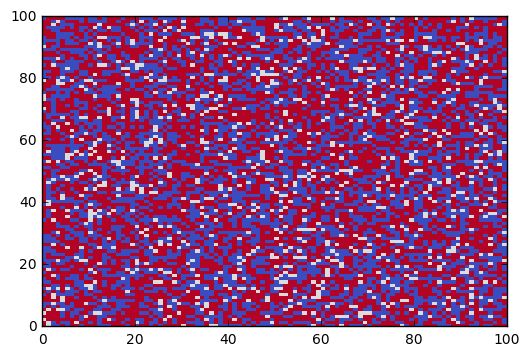

In [36]:
NewMatrix = np.random.choice([1, 1, 1, 1, 1, -1, -1, -1, -1, 0], size=(100, 100))

plt.pcolor(NewMatrix, cmap=colormap.coolwarm)
plt.gca().invert_yaxis()

plot_matrix(NewMatrix)

unhappy_cells = []

0


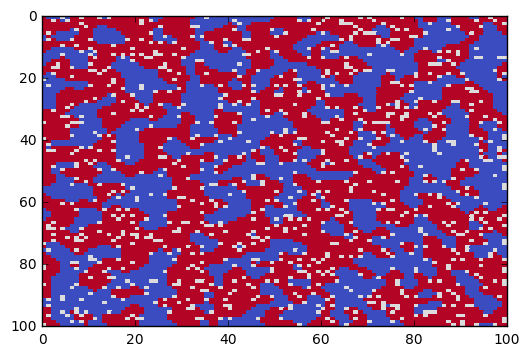

In [52]:
moved_cells = schelling_tick(NewMatrix, 0.6)
plot_matrix(NewMatrix)
print(len(moved_cells))
unhappy_cells.append((len(moved_cells)/ np.prod(NewMatrix.shape)))

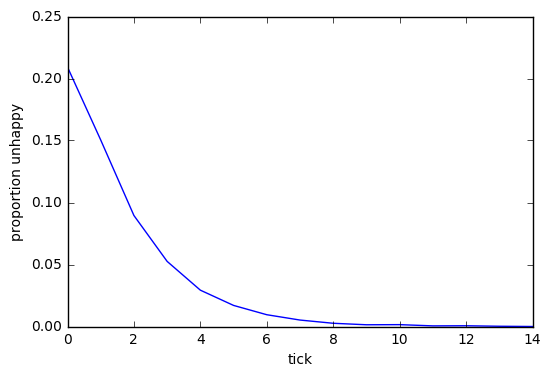

In [53]:
plt.plot(unhappy_cells)
plt.xlabel('tick')
plt.ylabel('proportion unhappy')